In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [19]:
df = pd.read_csv('price_prediction.csv')

In [20]:
df

,Crop,2004,2005,2006,2007,2008,2009,2010,2011
0,Rice,100,101,99,105,112,121,117,110
1,Wheat,100,101,112,115,117,127,120,108
2,Coarse Cereals,100,107,110,115,113,123,122,136
3,Pulses,100,108,134,124,124,146,137,129
4,Vegetables,100,109,103,118,113,124,128,115
5,Fruits,100,99,99,98,102,104,114,119
6,Milk,100,97,98,98,98,112,123,124
7,"Eggs, Fish and Meat",100,102,101,100,99,116,133,137
8,Oilseeds,100,86,85,97,104,103,99,102
9,Sugarcane,100,96,91,87,80,81,109,107


In [21]:
print(df.describe())

        2004       2005        2006        2007        2008        2009  \
count   12.0   12.00000   12.000000   12.000000   12.000000   12.000000   
mean   100.0   99.75000  102.000000  104.750000  106.416667  114.916667   
std      0.0    6.64865   12.634728   10.963783   11.261022   15.900019   
min    100.0   86.00000   85.000000   87.000000   80.000000   81.000000   
25%    100.0   96.75000   96.250000   97.750000  101.250000  106.250000   
50%    100.0  100.00000  100.000000  102.000000  107.500000  115.500000   
75%    100.0  103.25000  104.750000  115.000000  113.000000  123.250000   
max    100.0  109.00000  134.000000  124.000000  124.000000  146.000000   

             2010        2011  
count   12.000000   12.000000  
mean   121.916667  120.750000  
std     11.405408   12.800036  
min     99.000000  102.000000  
25%    116.250000  109.500000  
50%    122.500000  120.500000  
75%    129.250000  130.750000  
max    138.000000  140.000000  


In [22]:
# Reshape the data for time series analysis
df_melted = pd.melt(df, id_vars=['Crop'], var_name='Year', value_name='Price Index')

# Convert 'Year' to numeric
df_melted['Year'] = df_melted['Year'].str.replace('-', '').astype(int)

# One-hot encode the 'Crop' column
df_encoded = pd.get_dummies(df_melted, columns=['Crop'])

# Split data into features (X) and target (y)
X = df_encoded.drop('Price Index', axis=1)
y = df_encoded['Price Index']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
df_melted.head()

,Crop,Year,Price Index
0,Rice,2004,100
1,Wheat,2004,100
2,Coarse Cereals,2004,100
3,Pulses,2004,100
4,Vegetables,2004,100


                         MSE        R2
Linear Regression  92.173547  0.534589
Ridge Regression   92.118410  0.534867
Lasso Regression   97.848480  0.505934
Random Forest      73.979270  0.626457
Gradient Boosting  55.653655  0.718988


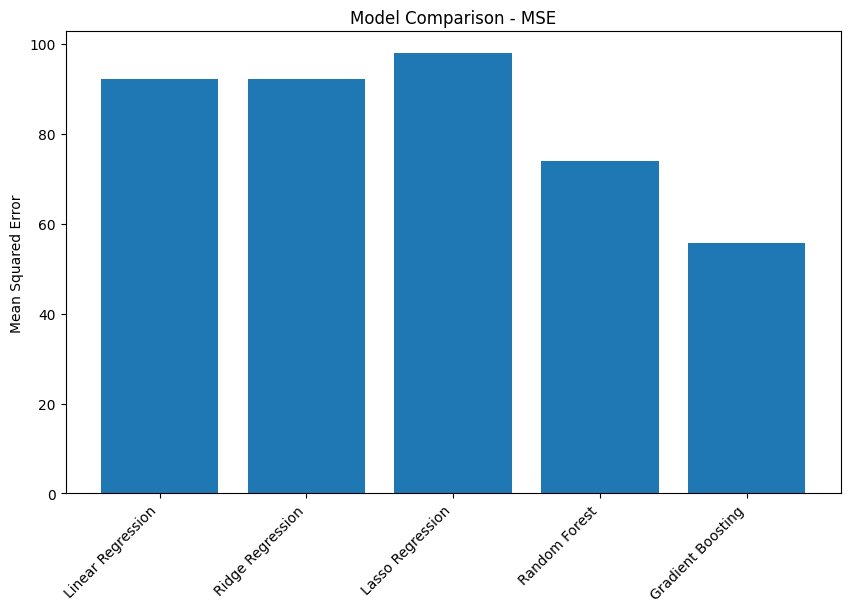

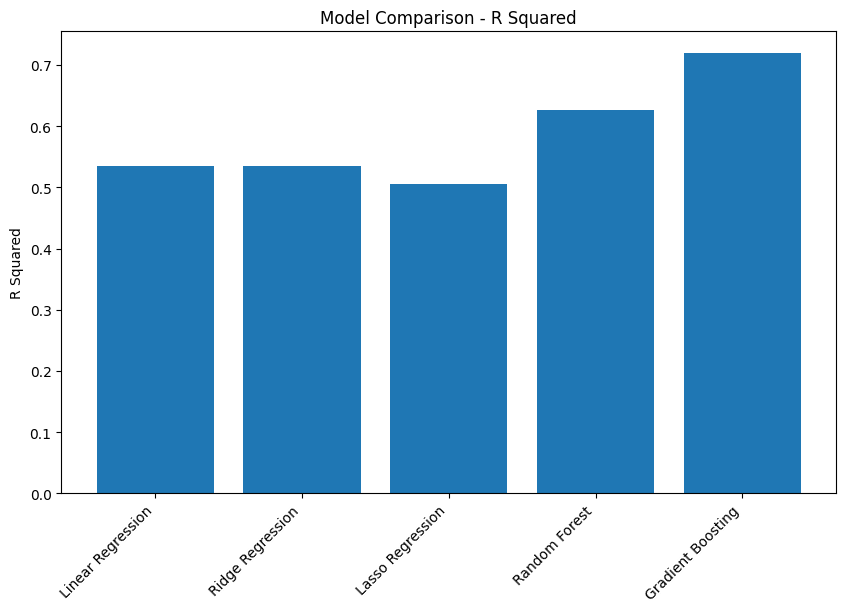

In [24]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

#Visualize the results
plt.figure(figsize=(10,6))
plt.bar(results_df.index, results_df['MSE'])
plt.ylabel("Mean Squared Error")
plt.title("Model Comparison - MSE")
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10,6))
plt.bar(results_df.index, results_df['R2'])
plt.ylabel("R Squared")
plt.title("Model Comparison - R Squared")
plt.xticks(rotation=45, ha='right')
plt.show()